In [1]:
from IPython.display import Image
import nltk

# 8 Analyzing Sentence Structure

- Mostly, we've been focused at the word level: identifying them, assigning them to parts of speech, meaning, or phrase structure. 
- Now, we are going to move up to sentences, which allows us to think about different problems inherent in human language. 
- Two big issues:
    - Ambiguity
    - Creativity

The goal of this chapter is to answer the following questions:
- How can we use a formal grammar to describe the structure of an unlimited set of sentences?
- How do we represent the structure of sentences using syntax trees?
- How do parsers analyze a sentence and automatically build a syntax tree?

## 1.1   Linguistic Data and Unlimited Possibilities

- Usain Bolt broke the 100m record
- The Jamaica Observer reported that Usain Bolt broke the 100m record
- Andre said The Jamaica Observer reported that Usain Bolt broke the 100m record
- I think Andre said the Jamaica Observer reported that Usain Bolt broke the 100m record

All of these sentences say the same basic thing, but are creative in the sense that they are uttered/written differently. What we see is a template to combine sentences. 

`[You can imagine Piglet's joy when at last the ship came in sight of him.] In after-years he liked to think that he had been in Very Great Danger during the Terrible Flood, but the only danger he had really been in was the last half-hour of his imprisonment, when Owl, who had just flown up, sat on a branch of his tree to comfort him, and told him a very long story about an aunt who had once laid a seagull's egg by mistake, and the story went on and on, rather like this sentence, until Piglet who was listening out of his window without much hope, went to sleep quietly and naturally, slipping slowly out of the window towards the water until he was only hanging on by his toes, at which moment, luckily, a sudden loud squawk from Owl, which was really part of the story, being what his aunt said, woke the Piglet up and just gave him time to jerk himself back into safety and say, "How interesting, and did she?" when — well, you can imagine his joy when at last he saw the good ship, Brain of Pooh (Captain, C. Robin; 1st Mate, P. Bear) coming over the sea to rescue him...`

- The previous sentence is actually just a combination of smaller sentences embedded together using S but S when S. 
- Therefore, due a property of language called **recursion**, we could create endlessly long sentences. 
- So, how should we define **grammar**?
    - Grammar is the system or structure of language
    - This system or structure gives us clues to meaning

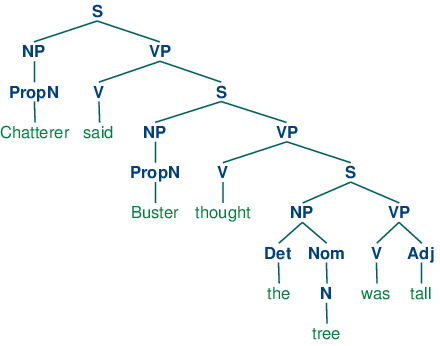

In [2]:
Image("lesson8-recursion.png")

**Generative Grammar**
- Chomsky approach to understanding language
- Language is considered a giant collection of all grammatical sentences
- Grammar is a set of logical rules to be able to generate grammatical sentences 
- Meaning is built from the parts of the sentences

## 1.2 Ambiguity

- I shot an elephant in my pajamas
- Multiple ways to parse this sentence and create a phase structure tree
- Who was in the pajamas? You or the elephant?

## 2 Syntax

- We've talked a lot about grammatical slots - meaning that words have specific combinations that they can follow given the previous word. 
- Therefore, we might be able to understand sentence structure (and generate our own) by looking at bigrams.

Let's create some sentences from a bigram set of a larger text:
- He roared with me the pail slip down his back
- The worst part and clumsy looking for whoever heard light

These ideas are tied to Chomsky's famous sentence:
- Colorless green ideas sleep furiously.
- Sometimes this is called "word-salad" when they are syntactically correct but do not mean anything. 
- Coordinate structure: If v1 and v2 are both phrases of grammatical category X, then v1 and v2 is also a phrase of category X.

Let's look at an example. 
- The book's ending was (NP the worst part and the best part) for me.
    - This is a NP + NP, which is readable and makes sense.
- On land they are (AP slow and clumsy looking).
    - This is AP + AP, which is readable and makes sense.
- The worst part and clumsy looking for whoever heard light
    - This is NP + AP, which is not readable or sensible. 

To understand **constituent structure**, we might try word substitution.
- Constituent structure is the idea that words combine together to form units, like NP, VP, AP. That means you can replace them with other constituents of the same type and keep grammar in place. 

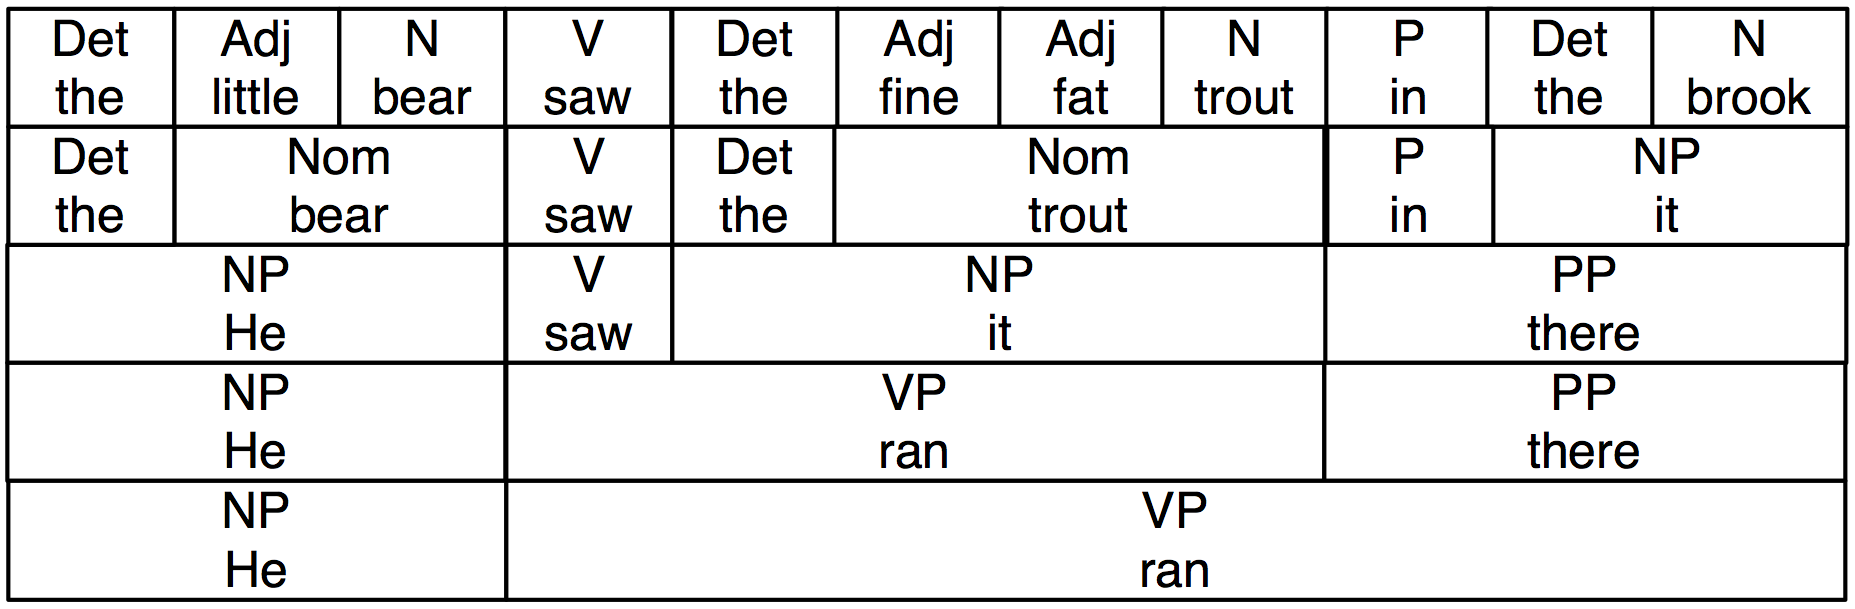

In [3]:
Image("lesson8-cs.png")

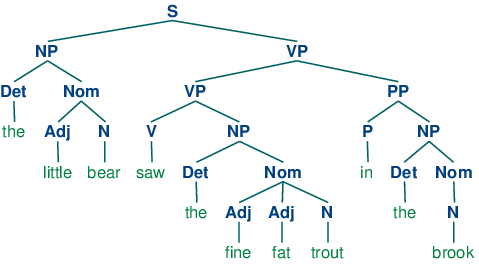

In [4]:
Image("lesson8-tree.png")
#Each node is a constituent. The immediate constituents of S are NP and VP.

## 3 Context Free Grammar

- Context free grammar is a set of recursive (iterative) rules used to generate sentences.
- The `nltk.grammar` module defines these for the `nltk` package.
- If sentences can be parsed into two more different structures, they are considered ambiguous. 

Syntactic Categories

- Symbol 	Meaning 	            Example
- S 	    sentence 	            the man walked
- NP 	    noun phrase             a dog
- VP 	    verb phrase             saw a park
- PP 	    prepositional phrase 	with a telescope
- Det 	    determiner 	            the
- N 	    noun 	                dog
- V 	    verb 	                walked
- P     	preposition           	in

## 4 Parsing With Context Free Grammar

- Parsing or a parser creates constituents and their structure to conform to grammar.
    - Compare this to: tokenizing, tagging, classifying, chunking
- Parsers are interpretations of a defined grammar - they search through the possible options of trees that the grammar says are ok and matches to the current sentence.
- We can use evaluation in the same way as the other functions that we've written to assure we are doing it correctly.
- The goal of parsers theoretically is to model psycholinguistic processing helping to understand how humans process syntax.
- The goal of parsers practically is to break down sentences - potentially for use in question answer type applications like Siri/chatboxes/help lines, etc. 

## 4.1 Recursive Descent Parsing

- Simplest parsing technique is to break down into lower level subgoals:
    - Big goal: find S.
    - Lower level goal: find NP, then VP.
    - Lower lower level goal: find NP and VP with N/V on the left most side.
- Top-down parser which uses a grammar to predict what the input might be

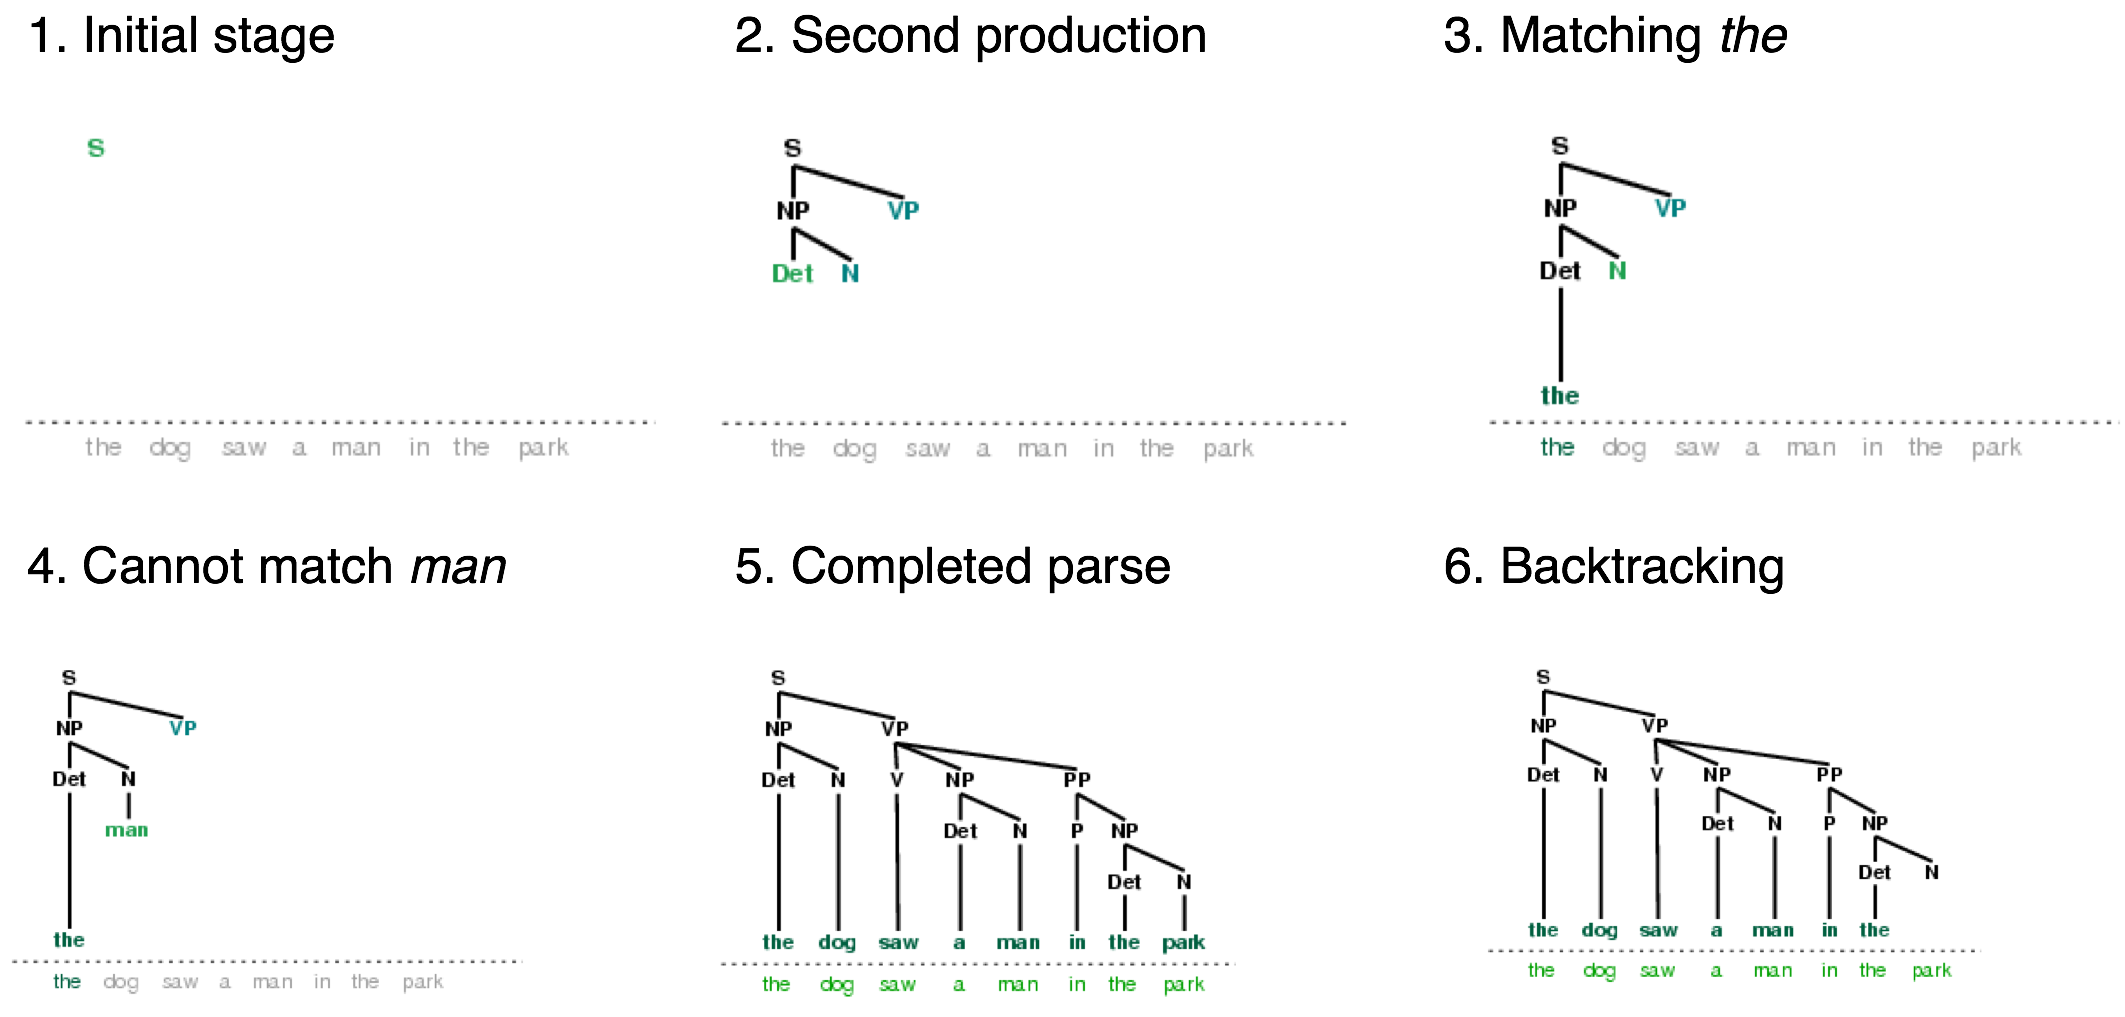

In [5]:
Image("lesson8-recursive.png")

In [6]:
##create our own grammar
#CFG.fromstring is the way nltk understand the grammar
#left side versus right side
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [7]:
#import the parser with our predefined grammar
rd_parser = nltk.RecursiveDescentParser(grammar1)

#create a new sentence to parse
sent = 'Mary saw a dog'.split()
print(sent)

#loop over sentences if you have more than one and print out the tree
for tree in rd_parser.parse(sent):
     print(tree)

['Mary', 'saw', 'a', 'dog']
(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


Problems with Recursive Decent Parsing:
- Left-recursive pieces like NP -> NP PP can cause it to loop infinitely
- Parser is slow and inefficient
- Backtracking can discard things that were already correctly parsed
- The top down nature of this parser is odd - why shouldn't we consider the input from the beginning?

## 4.2 Shift-Reduce Parsing

- A bottom up parser that considers the input of the sentences
- Tries to find sequences of words that are on the right side of the grammar, and replace them with the left side until we reach S
- Slowly "shifts" the next word into the window for the sentence (aka the stack)
- If the items in the stack currently match a right side rule, they get replaced (combined into a left side rule)
- Then this shift-replace continues until S is reached

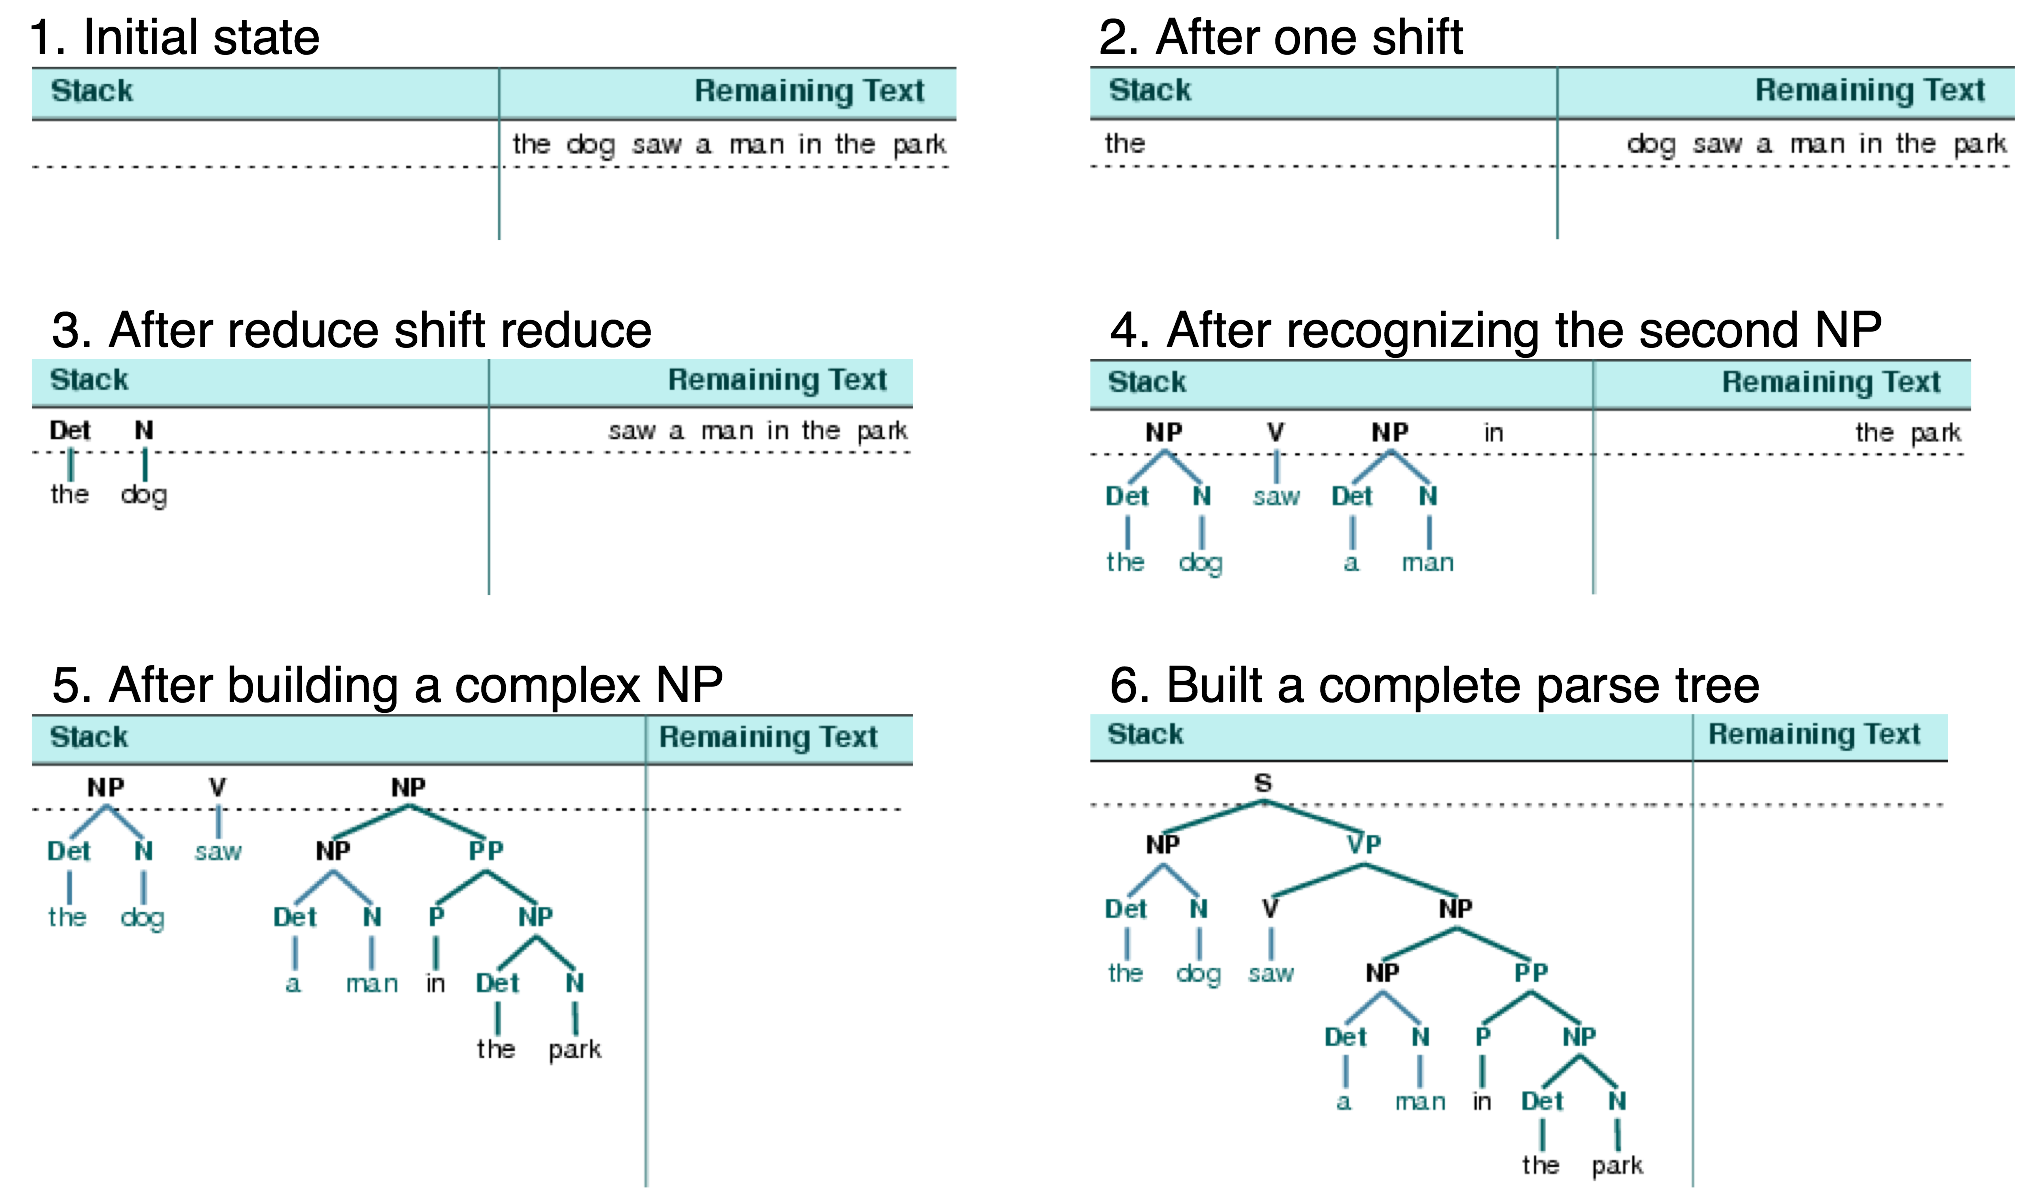

In [8]:
Image("lesson8-shift.png")

- We can use `ShiftReduceParser()` to implement this in Python.
- However, it does not have any backtracking, so it might fail to find a parse tree for a text
- Also, it will only find one tree, even if several are possible

In [9]:
sr_parser = nltk.ShiftReduceParser(grammar1)
sent = 'Mary saw a dog'.split()
for tree in sr_parser.parse(sent):
     print(tree)

(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


Problems with shift-reduce parsers:
- As noted, they can reach a dead end, even if the sentence was grammatical
- This happens when the original parse choices selected were incorrect and it can't figure out what to do with the left over words 
    - What reduction should it use when more than one is possible?
    - Should it shift or reduce when both are possible?
- You can extend these parsers to deal with these problems.

## 4.3 The Left-Corner Parser

- Left-corner parser is meant to solve the problems of the recursive descent as a hybrid of the bottom up and top down approaches
- A left-corner parser is a top-down parser with bottom-up filtering
- Before starting, the parser will create a table of all the possible left corners

- Let's say we wanted to parse "John saw Mary"

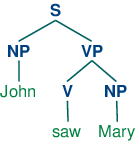

In [10]:
Image("lesson8-left.png")

However, remember how we defined `grammar1`:
- NP -> Det N
- NP -> Det N PP
- NP -> "John" | "Mary" | "Bob"

- How do we know which NP to start with first, since they are both left corners? 

## 5 Dependencies and Dependency Grammar

- Phrase structure gammar (what we've been doing) focuses on how to combine words into their constituents 
- Dependency grammar looks instead at the relation of words to other words
- You create a "head" and its dependents
- Usually the head is a verb - and then every other word is dependent on the verb or connected through a path of dependencies

- You can represent this as a graph, where nodes are each lexical item and arcs represent the dependencies
- For example, I is the SBJ (subject) of shot, and NMOD (noun modifier of elephant)

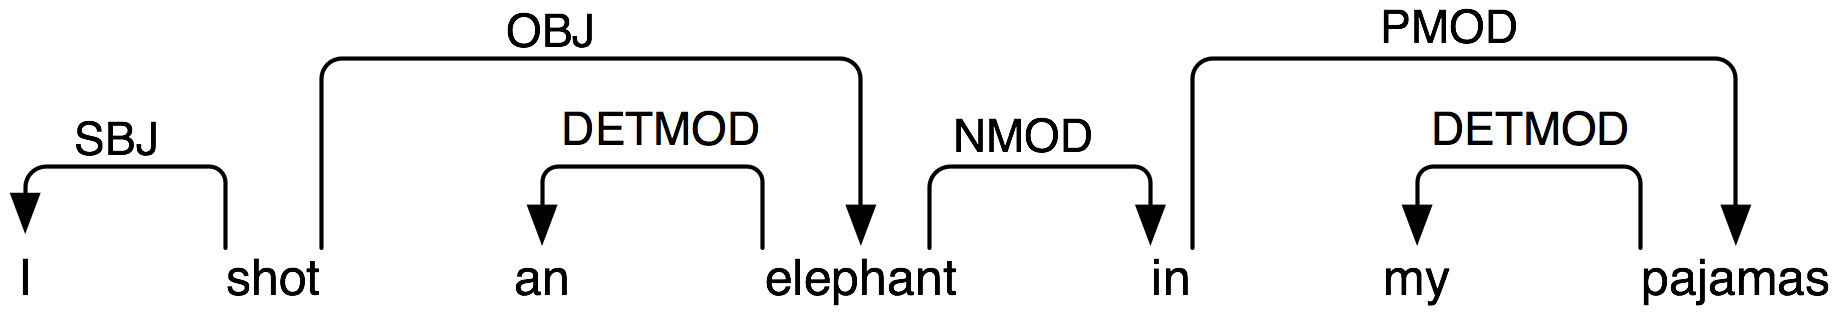

In [11]:
Image("lesson8-depend.png")

In [12]:
##here's how we might write a grammar dependency 
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
 'shot' -> 'I' | 'elephant' | 'in'
 'elephant' -> 'an' | 'in'
 'in' -> 'pajamas'
 'pajamas' -> 'my'
 """)

print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


- Graphs are considered **projective** if all the edges can be added without crossing
- Means that the word and all descendents for a continuous sequence of words in the sentence

In [13]:
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for tree in trees:
     print(tree)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


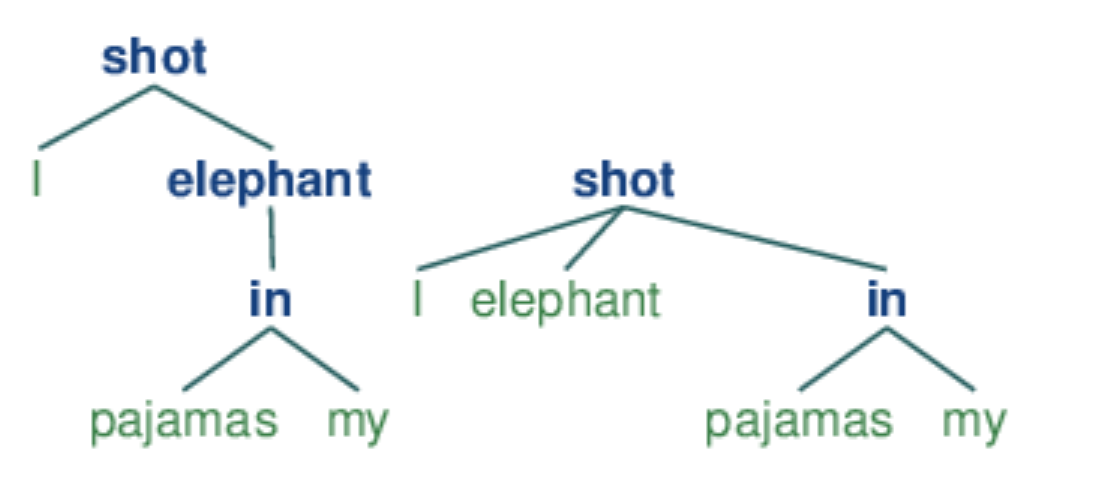

In [14]:
Image("lesson8-depend2.png")

What are the rules for determining what is a head and what is a dependent?

- Heads determine the way a sentence/construction is made
- Heads determine the semantic class of sentences/constructions
- Heads are required, dependents are optional
- The morphological form of the dependent is determined by the head

For example, let's say `PP | P and NP`:
- Prepositional phrases are where the preposition is the head and the noun phrase is the dependent of the preposition.
- This idea makes them similar to what we did at the beginning, just more explicit in their dependencies

## 5.1 Valency and the Lexicon

Let's look at verbs:

VP productions and their lexical heads
- VP -> V Adj 	was
- VP -> V NP 	saw
- VP -> V S 	thought
- VP -> V NP PP 	put

- The squirrel was frightened.
- Chatterer saw the bear.
- Chatterer thought Buster was angry.
- Joe put the fish on the log.

- Therefore:
    - Was can have an adjective after it
    - Saw can have a NP after it
    - Thought can have a sentence after it
    - Put can have an NP and PP after it

While this seems life a lot of different combinations, there are pretty set rules on what verbs can occur with their complements (the words after it - we've been calling these grammatical slots). 

- The squirrel was Buster was angry.
- Chatterer saw frightened.
- Chatterer thought the bear.
- Joe put on the log.

- Verbs (in this case, but really words) with different dependents are considered to have different **valencies**. 
- We would need to find a way to expand/create the VP so it gets matched with the correct complement (constituent). 
- We can create subcategories of verbs that fall into V + complement groups
    - For example, transitive verbs require a direct object, which would be a noun phrase

Verb Subcategories
- Symbol 	Meaning 	Example
- IV 	intransitive verb 	barked
- TV 	transitive verb 	saw a man
- DatV 	dative verb 	gave a dog to a man
- SV 	sentential verb 	said that a dog barked

- Another piece to consider would be a modifier, as prepositional phrases, adjectives, and adverbs 
- Unlike a complement, modifiers are option AND there can also be several of them

- The squirrel really was frightened.
- Chatterer really saw the bear.
- Chatterer really thought Buster was angry.
- Joe really put the fish on the log.

## 5.2 Scaling Up

- We've only talked about a few small instances of grammar
- It's **really** hard to scale up to the infinite number of possibilities for different grammatical constructions 
- Ambiguity expands as the number of possible constructions expands 
- Learn more by looking into Lexical Functional Grammar Pargram project, Head Driven Phrase Structure Grammar, and Lexicalized Tree Adjoining Grammar project
- Some work may be possible by using probablistic context free grammars by creating likelihoods of the phrase structure combinations to expect